In [1]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
#import example_helpers
import drms

Querying series info...
     T_REC : Slotted observation time
     T_OBS : Observation time
   DATAMIN : Minimum value of all pixels
   DATAMAX : Maximum value of all pixels
  DATAMEAN : Mean value of all pixels
   DATARMS : Rms deviation from the mean value of all pixels
  DATASKEW : Skewness from the mean value of all pixels
  DATAKURT : Kurtosis of all pixels
   QUALITY : Level 1 Quality word
Querying keyword data...
 -> aia.lev1_euv_12s[2014-01-01T00:00:01Z/365d@1d][335]
 -> 364 lines retrieved.
 -> 362 lines after QUALITY selection.


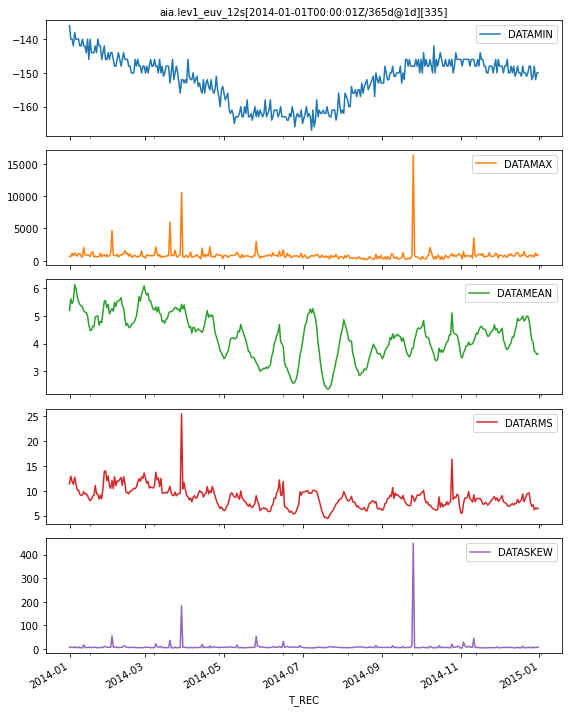

In [2]:
# Series name, timespan and wavelength
series = 'aia.lev1_euv_12s'
series_lev1 = 'aia.lev1'
wavelen = 335
#tsel = '2015-01-01T00:00:01Z/1h'
#tsel = '2015-01-01T00:00:01Z/1d'
#tsel = '2015-01-01T00:00:01Z/1d@60s'
#tsel = '2015-01-01T00:00:01Z/7d@1h'
#tsel = '2015-01-01T00:00:01Z/30d@6h'
#tsel = '2015-01-01T00:00:01Z/100d@1d'
tsel = '2014-01-01T00:00:01Z/365d@1d'

# DRMS query string
qstr = '%s[%s][%d]' % (series, tsel, wavelen)

# Some keywords we are interested in; you can use c.keys(series) to get a
# list of all available keywords of a series.
keys = ['T_REC', 'T_OBS', 'DATAMIN', 'DATAMAX', 'DATAMEAN', 'DATARMS',
        'DATASKEW', 'DATAKURT', 'QUALITY']


# Create DRMS client, uses JSOC baseurl by default, set debug=True to see the
# DRMS query URLs.
c = drms.Client(debug=False)

# Get detailed information about the series. Some keywords from
# aia.lev1_euv_12s are links to keywords in aia.lev1 and unfortunally some
# entries (like note) are missing for linked keywords, so we are using the
# entries from aia.lev1 in this case.
print('Querying series info...')
si = c.info(series)
si_lev1 = c.info(series_lev1)
for k in keys:
    linkinfo = si.keywords.loc[k].linkinfo
    if linkinfo is not None and linkinfo.startswith('lev1->'):
        note_str = si_lev1.keywords.loc[k].note
    else:
        note_str = si.keywords.loc[k].note
    print('%10s : %s' % (k, note_str))

# Get keyword values for the selected timespan and wavelength
print('Querying keyword data...\n -> %s' % qstr)
res = c.query(qstr, key=keys)
print(' -> %d lines retrieved.' % len(res))

# Only use entries with QUALITY==0
res = res[res.QUALITY == 0]
print(' -> %d lines after QUALITY selection.' % len(res))

# Convert T_REC strings to datetime and use it as index for the series
res.index = drms.to_datetime(res.T_REC)

# Create some simple plots
ax = res[['DATAMIN', 'DATAMAX', 'DATAMEAN', 'DATARMS', 'DATASKEW']].plot(
    figsize=(8, 10), subplots=True)
ax[0].set_title(qstr, fontsize='medium')
plt.tight_layout()
plt.show()